## Observations and Insights 

Observations
- Lots of Mice didn't seem to live to the end of the treatment (timepoint 45) from the final timepoint dataframe, and thus we can't be conclusive with our findings using data from mice that only lived a short time. Ideally only mice that made the full timepoint should be used because then a better comparison can be made because the drug used has a longer time to work in the mouse's system
- Capomulin and Ramicane have far smaller mean sizes of Tumors which may come down to them being more effective drugs than their conterparts
- The MOuse g316 showwed a massive reduction in the size of its tumor in the final timepoint according to the linegraph, which would indicate a potential effective drug.
- The correlation coefficient and linear regression model shows a positive correlation in that the heavier the mouse the greater the tumor size on average.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
mouse_data = merge_df.copy()
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
Mouse_unique = len(merge_df["Mouse ID"].unique())
Mouse_unique

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mice_df = merge_df[merge_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
dupe_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mice_df.head(30)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data.drop(mouse_data[mouse_data['Mouse ID'] == "g989"].index, inplace = True)
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
Mouse2_unique = len(mouse_data["Mouse ID"].unique())
Mouse2_unique

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.


summary_df = mouse_data.groupby(["Drug Regimen"]).describe()                                                    # Used Describe as it had 3 of the sets of data I wanted
summary_df = summary_df["Tumor Volume (mm3)"]
summary2_df = summary_df.drop(columns=['count','min', '25%', '75%', 'max'])
summary2_df = summary2_df.rename(columns={"50%":"median"})

summary3_df = mouse_data.groupby(["Drug Regimen"])                                                              # Made a DF for Variance
summary3_df = summary3_df["Tumor Volume (mm3)"].var()

summary4_df = mouse_data.groupby(["Drug Regimen"])                                                              # Made a DF for SEM
summary4_df = summary4_df["Tumor Volume (mm3)"].sem()

merged_df = pd.merge(summary2_df, summary3_df, on="Drug Regimen", how="outer")                                  # Merged all the data frames together on "Drug Regimen" 
merged_df = merged_df.rename(columns={"Tumor Volume (mm3)":"variance"})
merged2_df = pd.merge(merged_df, summary4_df, on="Drug Regimen", how="outer")                     
merged2_df = merged2_df.rename(columns={"Tumor Volume (mm3)":"sem", "std" : "standard deviation"})
merged2_df = merged2_df.loc[:, ["mean", "median","variance", "standard deviation", "sem"]]
merged2_df.head(10)




,mean,median,variance,standard deviation,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
agg_func = {'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']}

mouse_data.groupby(['Drug Regimen']).agg(agg_func)


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

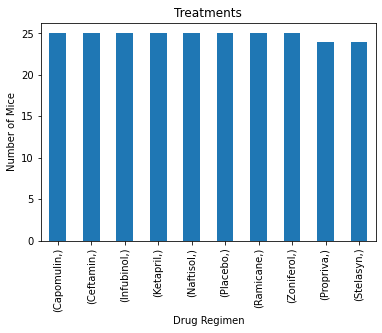

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_mice_df = mouse_data.copy()
bar_mice_df = mouse_data[["Mouse ID", "Drug Regimen"]].drop_duplicates() 
bar_mice_df[["Drug Regimen"]].value_counts()
counts = bar_mice_df[["Drug Regimen"]].value_counts()

counts.plot(kind="bar", title="Treatments")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()



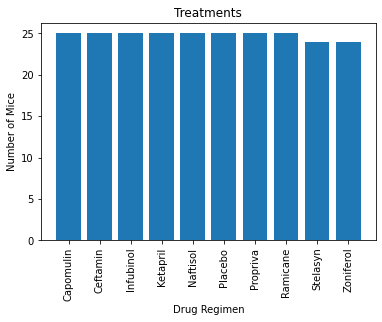

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
bar_mice_df = mouse_data.copy()
bar_mice_df = mouse_data[["Mouse ID", "Drug Regimen"]].drop_duplicates() 
counts = bar_mice_df[["Drug Regimen"]].value_counts()

x_axis = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol" ,"Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
drugs = counts

plt.bar(x_axis, drugs, align="center")

plt.title("Treatments")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:ylabel='None'>

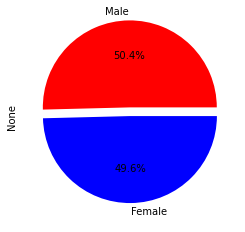

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = mouse_data[["Mouse ID", "Sex"]].drop_duplicates() 
gender_counts_df = gender_df[["Sex"]].value_counts()
labels = ["Male", "Female"]
colors = ["red", "blue"]
explode = (0.1, 0)
gender_counts_df.plot(kind='pie', y='points',labels=labels, colors=colors, autopct="%1.1f%%", explode=explode)


([<matplotlib.patches.Wedge at 0x2df292b2748>,
 [Text(-0.01520083372288487, 1.1999037189100337, 'Male'),
  Text(0.013934097579310996, -1.0999117423341975, 'Female')],
 [Text(-0.008867153005016174, 0.699943836030853, '50.4%'),
  Text(0.007600416861442361, -0.5999518594550168, '49.6%')])

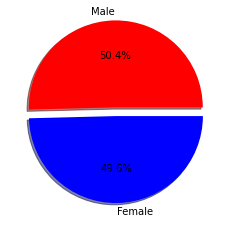

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df = mouse_data[["Mouse ID", "Sex"]].drop_duplicates() 
gender_counts_df = gender_df[["Sex"]].value_counts()
gender_counts_df
labels = ["Male", "Female"]
counts = [125, 123]
colors = ["red", "blue"]
explode = (0.1, 0)
plt.pie(counts, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True,)


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mouse_box = mouse_data.sort_values('Timepoint', ascending=False).drop_duplicates(['Mouse ID'])

mouse_box.drop(mouse_box.index[mouse_box['Drug Regimen'] == 'Naftisol'], inplace=True)
mouse_box.drop(mouse_box.index[mouse_box['Drug Regimen'] == 'Zoniferol'], inplace=True)
mouse_box.drop(mouse_box.index[mouse_box['Drug Regimen'] == 'Ketapril'], inplace=True)
mouse_box.drop(mouse_box.index[mouse_box['Drug Regimen'] == 'Propriva'], inplace=True)
mouse_box.drop(mouse_box.index[mouse_box['Drug Regimen'] == 'Placebo'], inplace=True)
mouse_box.drop(mouse_box.index[mouse_box['Drug Regimen'] == 'Stelasyn'], inplace=True)
mouse_box


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
360,g316,Capomulin,Female,22,22,45,40.159220,2
124,y793,Capomulin,Male,17,17,45,31.896238,2
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
350,v923,Capomulin,Female,19,21,45,40.658124,2
1379,p438,Ceftamin,Female,11,26,45,61.433892,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1583,u153,Ceftamin,Female,11,25,0,45.000000,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

Cap_Drug = mouse_box.loc[mouse_box['Drug Regimen'] == "Capomulin", "Tumor Volume (mm3)"]
Cef_Drug = mouse_box.loc[mouse_box['Drug Regimen'] == "Ceftamin", "Tumor Volume (mm3)"]
Ram_Drug = mouse_box.loc[mouse_box['Drug Regimen'] == "Ramicane", "Tumor Volume (mm3)"]
Inf_Drug = mouse_box.loc[mouse_box['Drug Regimen'] == "Infubinol", "Tumor Volume (mm3)"]

   

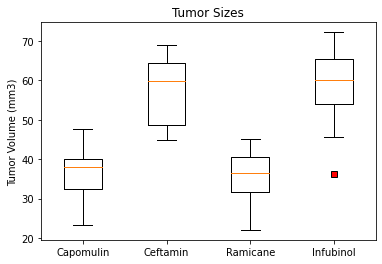

In [37]:

Data = [Cap_Drug, Cef_Drug, Ram_Drug, Inf_Drug]
box, ax = plt.subplots()
red_square = dict(markerfacecolor='r', marker='s')
ax.set_title('Tumor Sizes')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(Data, vert=True, flierprops=red_square)
plt.xticks([1, 2, 3, 4], ['Capomulin','Ceftamin','Ramicane','Infubinol'])
plt.show()


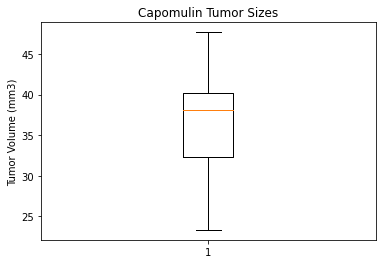

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box1, ax1 = plt.subplots()
ax1.set_title('Capomulin Tumor Sizes')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(Cap_Drug)
plt.show()
Cap_quartiles = Cap_Drug.quantile([.25,.5,.75])

Cap_lowerq = Cap_quartiles[0.25]
Cap_upperq = Cap_quartiles[0.75]
Cap_iqr = Cap_upperq-Cap_lowerq

print(f"The lower quartile of Capomulin is: {Cap_lowerq}")
print(f"The upper quartile of Capomulin is: {Cap_upperq}")
print(f"The interquartile range of Capomulin is: {Cap_iqr}")
print(f"The the median of Capomulin is: {Cap_quartiles[0.5]} ")

Cap_lower_bound = Cap_lowerq - (1.5*Cap_iqr)
Cap_upper_bound = Cap_upperq + (1.5*Cap_iqr)
print(f"Values below {Cap_lower_bound} could be outliers.")
print(f"Values above {Cap_upper_bound} could be outliers.")


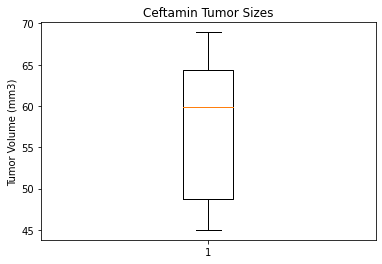

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [17]:
box2, ax2 = plt.subplots()
ax2.set_title('Ceftamin Tumor Sizes')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.boxplot(Cef_Drug)
plt.show()
Cef_quartiles = Cef_Drug.quantile([.25,.5,.75])

Cef_lowerq = Cef_quartiles[0.25]
Cef_upperq = Cef_quartiles[0.75]
Cef_iqr = Cef_upperq-Cef_lowerq

print(f"The lower quartile of Ceftamin is: {Cef_lowerq}")
print(f"The upper quartile of Ceftamin is: {Cef_upperq}")
print(f"The interquartile range of Ceftamin is: {Cef_iqr}")
print(f"The the median of Ceftamin is: {Cef_quartiles[0.5]} ")

Cef_lower_bound = Cef_lowerq - (1.5*Cef_iqr)
Cef_upper_bound = Cef_upperq + (1.5*Cef_iqr)
print(f"Values below {Cef_lower_bound} could be outliers.")
print(f"Values above {Cef_upper_bound} could be outliers.")

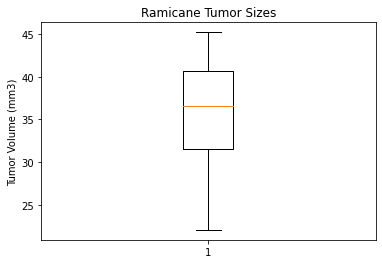

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [18]:
box3, ax3 = plt.subplots()
ax3.set_title('Ramicane Tumor Sizes')
ax3.set_ylabel('Tumor Volume (mm3)')
ax3.boxplot(Ram_Drug)
plt.show()
Ram_quartiles = Ram_Drug.quantile([.25,.5,.75])

Ram_lowerq = Ram_quartiles[0.25]
Ram_upperq = Ram_quartiles[0.75]
Ram_iqr = Ram_upperq-Ram_lowerq

print(f"The lower quartile of Ramicane is: {Ram_lowerq}")
print(f"The upper quartile of Ramicane is: {Ram_upperq}")
print(f"The interquartile range of Ramicane is: {Ram_iqr}")
print(f"The the median of Ramicane is: {Ram_quartiles[0.5]} ")

Ram_lower_bound = Ram_lowerq - (1.5*Ram_iqr)
Ram_upper_bound = Ram_upperq + (1.5*Ram_iqr)
print(f"Values below {Ram_lower_bound} could be outliers.")
print(f"Values above {Ram_upper_bound} could be outliers.")

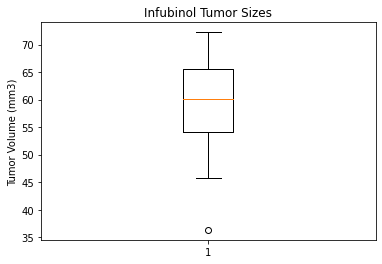

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [19]:
box4, ax4 = plt.subplots()
ax4.set_title('Infubinol Tumor Sizes')
ax4.set_ylabel('Tumor Volume (mm3)')
ax4.boxplot(Inf_Drug)
plt.show()
Inf_quartiles = Inf_Drug.quantile([.25,.5,.75])

Inf_lowerq = Inf_quartiles[0.25]
Inf_upperq = Inf_quartiles[0.75]
Inf_iqr = Inf_upperq-Inf_lowerq

print(f"The lower quartile of Infubinol is: {Inf_lowerq}")
print(f"The upper quartile of Infubinol is: {Inf_upperq}")
print(f"The interquartile range of Infubinol is: {Inf_iqr}")
print(f"The the median of Infubinol is: {Inf_quartiles[0.5]} ")

Inf_lower_bound = Inf_lowerq - (1.5*Inf_iqr)
Inf_upper_bound = Inf_upperq + (1.5*Inf_iqr)
print(f"Values below {Inf_lower_bound} could be outliers.")
print(f"Values above {Inf_upper_bound} could be outliers.")

## Line and Scatter Plots

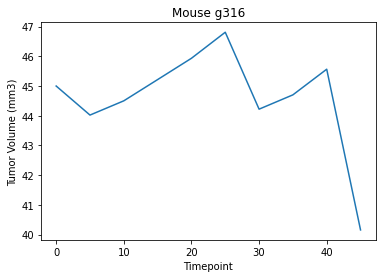

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# I chose mouse with ID = g316

mouse_line = mouse_data[mouse_data['Mouse ID'] == 'g316']
mouse_line.head(15)
x_axis = mouse_line['Timepoint']
y_axis = mouse_line['Tumor Volume (mm3)']

plt.title("Mouse g316")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, y_axis)
plt.show()

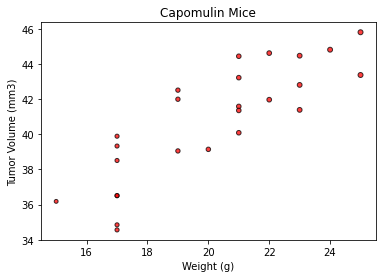

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouse_scatter = mouse_data[mouse_data['Drug Regimen'] == 'Capomulin']
mouse_scatter2 = mouse_scatter.groupby(['Mouse ID']).mean()

x_axis2 = mouse_scatter2['Weight (g)']
y_axis2 = mouse_scatter2['Tumor Volume (mm3)']

plt.title("Capomulin Mice")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(x_axis2, y_axis2, marker="o", facecolors="red", edgecolors="black",
           s=x_axis2, alpha=0.75)




## Correlation and Regression

The correlation coefficient between both factors is 0.84
The linear regression is: 0.7088568047708723


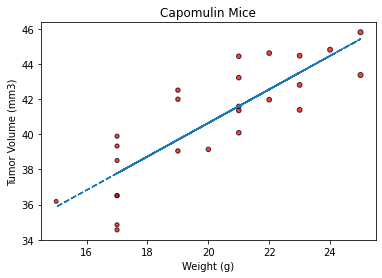

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(x_axis2, y_axis2)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis2, y_axis2)
print(f"The linear regression is: {rvalue**2}")
Regline = slope * x_axis2 + intercept
plt.title("Capomulin Mice")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(x_axis2, y_axis2, marker="o", facecolors="red", edgecolors="black",
           s=x_axis2, alpha=0.75)
plt.plot(x_axis2,Regline,"--")